In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
'''
First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?
'''

"\nFirst some basic questions:\n\n1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)\n2.) What deck were the passengers on and how does that relate to their class?\n3.) Where did the passengers come from?\n4.) Who was alone and who was with family?\n\nThen we'll dig deeper, with a broader question:\n\n5.) What factors helped someone survive the sinking?\n"

In [7]:
# 1) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

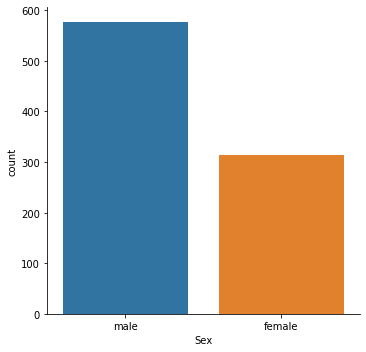

In [23]:
# Let's first check gender
'''
UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
'''
sns.catplot('Sex', data=titanic_df, kind="count")

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

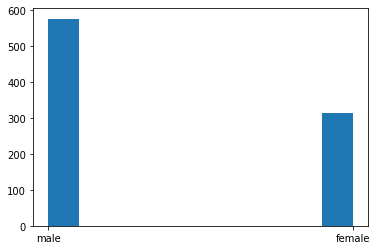

In [19]:
#moj pokusaj da izvucem situaciju, al nasla sam u dokumentaciji resenje, kad je u tabeli unos string razmisli o kind="count"
plt.hist(titanic_df["Sex"])

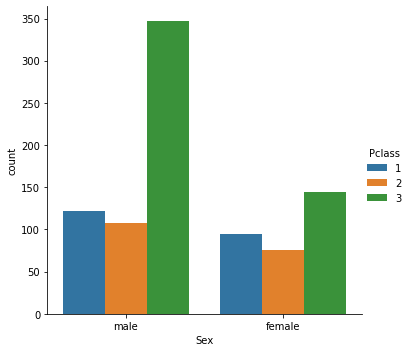

In [25]:
#Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
#hue biramo kolonu u podacima po cemu kategorisemo 
sns.catplot('Sex', data = titanic_df, kind="count", hue='Pclass')

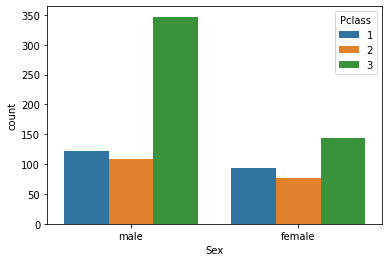

In [26]:
#moze i ovako, vrsta catplot ciji je kind='count'
sns.countplot('Sex', data = titanic_df, hue='Pclass')

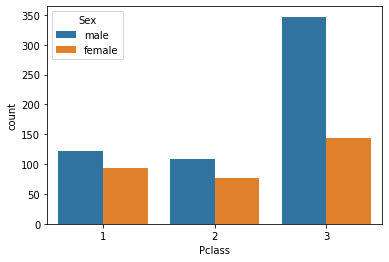

In [27]:
sns.countplot('Pclass', data = titanic_df, hue='Sex')

In [28]:
#pravimo funkciju u kojoj odvajamo decu od odraslih, sami stavljamo granicu 16 god
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [29]:
#dodajemo kolonu u nasim podacima, koja ce primenom funckije dobijati vrednosti male, female, child
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [30]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


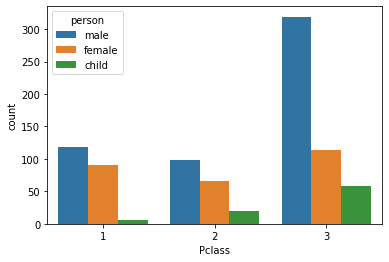

In [31]:
sns.countplot('Pclass', data=titanic_df, hue='person')

Text(0, 0.5, 'Number of passengers')

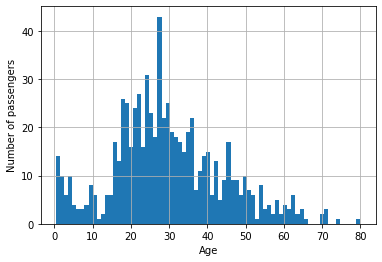

In [47]:
titanic_df['Age'].hist(bins=75)
plt.xlabel('Age')
plt.ylabel('Number of passengers')

In [34]:
titanic_df['Age'].mean()

29.69911764705882

In [49]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

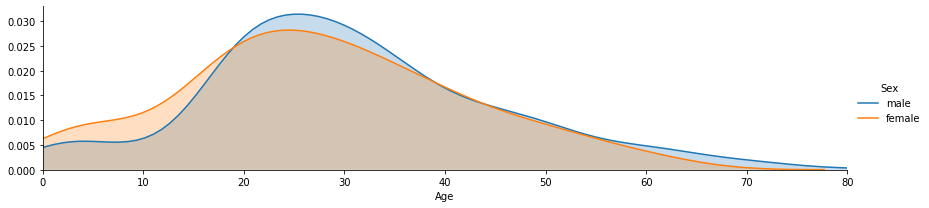

In [50]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

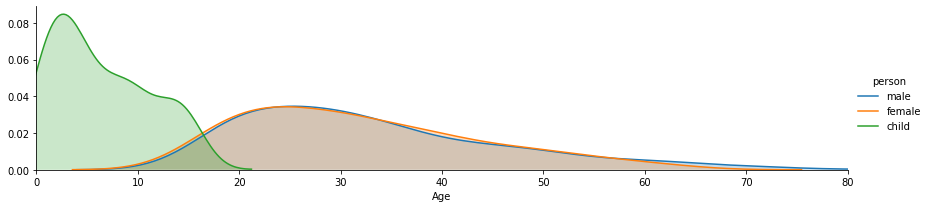

In [51]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

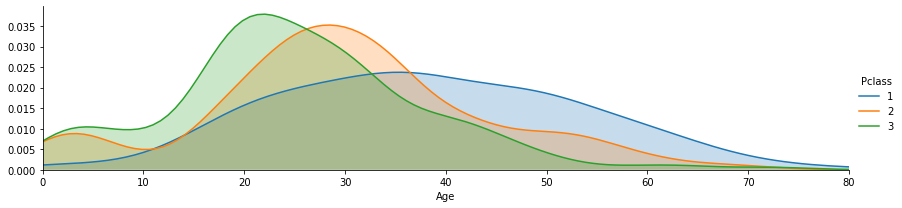

In [52]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [53]:
# What deck were the passengers on and how does that relate to their class?

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [55]:
#prvo cemo sve Null podatke iz kolone Cabin izbaciti i napraviti kolonu deck
deck = titanic_df['Cabin'].dropna()

In [56]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

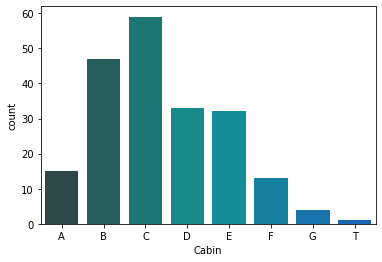

In [79]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df.sort_values(by='Cabin')
sns.countplot('Cabin', data=cabin_df, palette='winter_d')

In [76]:
cabin_df = cabin_df.sort_values(by='Cabin')

,Cabin
106,A
33,A
41,A
97,A
146,A
...,...
40,G
3,G
90,G
48,G


In [80]:
cabin_df

,Cabin
106,A
33,A
41,A
97,A
146,A
...,...
40,G
3,G
90,G
48,G


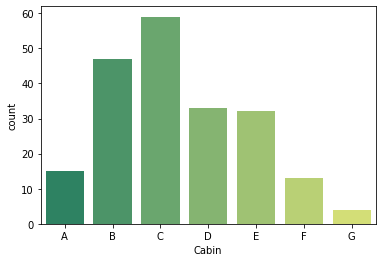

In [86]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin', data=cabin_df, palette='summer')

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [88]:
# 3) Where did the passengers come from?

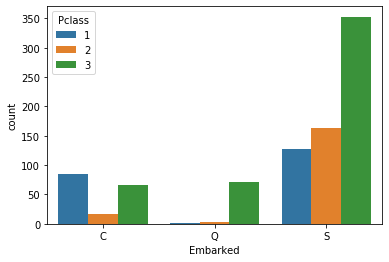

In [93]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'])

In [94]:
# 4) Who was alone and who was with family?

In [95]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [96]:
#sabiramo kolonu u kojoj je broj sestara/brace i supruznika i kolonu u kojoj je br roditelja i dece putnika 
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [97]:
#ako je neko sam na brodu, vrednost je 0, ako ne, onda je bilo sta drugo
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [99]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\I.L.Ribar\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


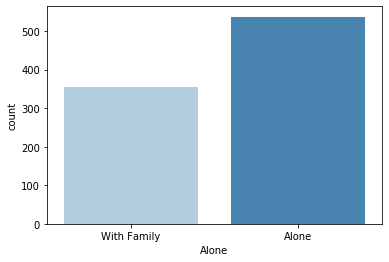

In [101]:
sns.countplot('Alone', data=titanic_df, palette='Blues')

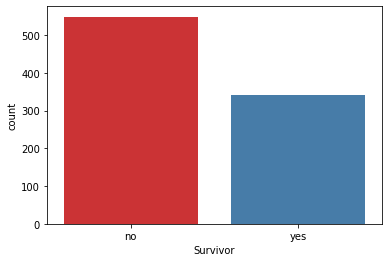

In [102]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor', data=titanic_df, palette='Set1')

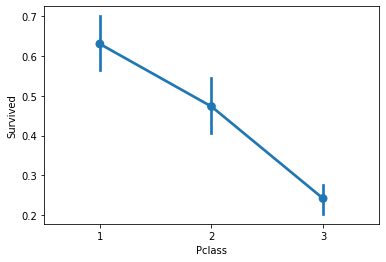

In [104]:
#hocemo da vidimo kako je uticala klasa na sansu prezivljavanja
sns.pointplot('Pclass', 'Survived', data=titanic_df)

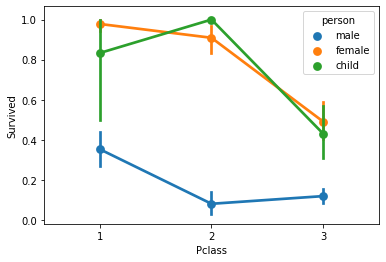

In [105]:
#pored klase, gledamo i pol, da bi proverili pravilo 'Prvo zene i deca'
sns.pointplot('Pclass','Survived', hue='person', data=titanic_df)

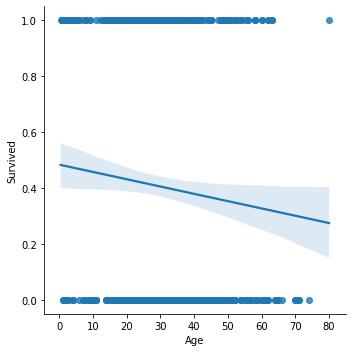

In [106]:
sns.lmplot('Age','Survived', data=titanic_df)

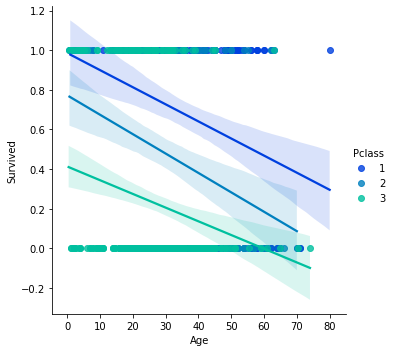

In [108]:
sns.lmplot('Age','Survived', hue='Pclass',data=titanic_df,palette='winter')

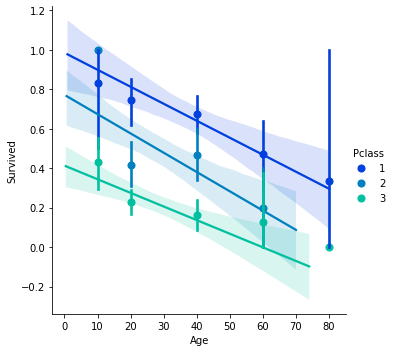

In [110]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='winter',x_bins=generations)

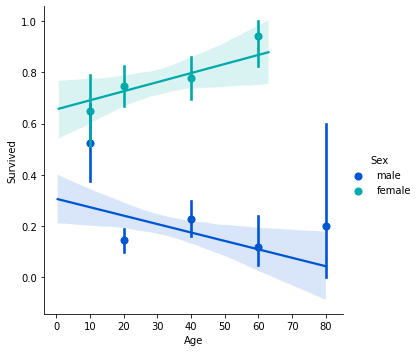

In [112]:
sns.lmplot('Age','Survived',hue='Sex', data=titanic_df, palette='winter',x_bins=generations)

In [113]:
# 1) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
# 2) Did having a family member increase the odds of surviving the crash?
